### Installing of Requirements (only run this if you haven't installed the necessary libraries found in requirements.txt)

In [1]:
import geopandas as  gpd
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import requests
from io import BytesIO
from PIL import Image

C:\Users\Sean\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Reading the Paranaque Images and Saving a compiled GEOJSON file of the images 

In [2]:
base_dir = os.getcwd()

In [3]:
# Accessing the data of Paranque images
paranaque_json_dir =  'data/json/paranaque'
os.chdir(paranaque_json_dir)


In [4]:
gdf_list = []
geojson_Count = 0

In [5]:
for file in os.listdir():
    if file.endswith('.geojson'):
        gdf = gpd.read_file(file)
        geojson_Count += 1
        
        # filter out null json files
        if '"features": []' not in gdf:
            gdf = gpd.read_file(file)
            gdf_list.append(gdf)
            

In [6]:
if gdf_list:
    merged_gdf = gpd.GeoDataFrame(pd.concat(gdf_list, ignore_index=True), crs=gdf_list[0].crs)
    
    img_urls = merged_gdf["thumb_2048_url"]
    coordinates = merged_gdf["geometry"]
else:
    print("No GeoJSON files with features found.")

In [7]:
os.chdir(base_dir)

In [8]:
os.getcwd()

'C:\\Users\\Sean\\Documents\\Python Notebooks\\street-image-extractor'

# Saving images locally

## Distanced Images (200 meters apart)

### PARANAQUE

In [9]:
img_dir = "data/images/newParanaque"

In [10]:
merged_gdf = gpd.GeoDataFrame(pd.concat(gdf_list, ignore_index=True), crs=gdf_list[0].crs)

In [14]:
img_urls = merged_gdf["thumb_2048_url"]
img_urls = img_urls.to_numpy()
num_digits = len(str(len(img_urls)))


In [15]:
added_coords = []

In [16]:
# !pip install geopy

In [18]:
from geopy.distance import distance

start_index = 0

for i, img_url in enumerate(img_urls[start_index:], start=start_index):
    file_number = str(i).zfill(num_digits)
    img_path = f"{img_dir}/paranaque{file_number}.jpg"

    if added_coords:
        far_enough = True
        coord = (coordinates[i].x, coordinates[i].y)
        for added_coord in added_coords:
            dist = distance((added_coord[1],added_coord[0]), (coord[1],coord[0])).kilometers
            if dist <= 0.2:
                far_enough = False
                break
                
        if(far_enough):
            response = requests.get(img_url)
            img = Image.open(BytesIO(response.content))
            img.save(img_path, "JPEG")
            added_coords.append(coord)
    else:
        response = requests.get(img_url)
        img = Image.open(BytesIO(response.content))
        file_number = str(i).zfill(num_digits)
        img.save(f"{img_dir}/paranaque{file_number}.jpg", "JPEG")
        added_coords.append((coordinates[i].x, coordinates[i].y))


In [19]:
len(added_coords)

572

In [20]:
import csv

csv_file_path = "data/csv/newParanaque_saved_coordinates.csv"
with open(csv_file_path, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["X", "Y"])  # Header
    for coord in added_coords:
        writer.writerow([coord[0], coord[1]])

print("Saved coordinates are written to:", csv_file_path)

Saved coordinates are written to: data/csv/newParanaque_saved_coordinates.csv


### PASIG

In [39]:
base_dir = os.getcwd()

In [ ]:
os.getcwd()

'C:\\Users\\Sean\\Documents\\Python Notebooks\\street-image-extractor'

In [41]:
# Accessing the data of Pasig images
pasig_json_dir =  'data/json/pasig'
os.chdir(pasig_json_dir)

In [42]:
gdf_list = []
geojson_Count = 0

In [43]:
for file in os.listdir():
    if file.endswith('.geojson'):
        gdf = gpd.read_file(file)
        geojson_Count += 1
        
        # filter out null json files
        if '"features": []' not in gdf:
            gdf = gpd.read_file(file)
            gdf_list.append(gdf)
            

In [44]:
if gdf_list:
    merged_gdf = gpd.GeoDataFrame(pd.concat(gdf_list, ignore_index=True), crs=gdf_list[0].crs)
    
    img_urls = merged_gdf["thumb_2048_url"]
    coordinates = merged_gdf["geometry"]
else:
    print("No GeoJSON files with features found.")

In [45]:
os.chdir(base_dir)

In [46]:
os.getcwd()

'C:\\Users\\Sean\\Documents\\Python Notebooks\\street-image-extractor'

In [47]:
img_dir = "data/images/newPasig"

In [48]:
merged_gdf = gpd.GeoDataFrame(pd.concat(gdf_list, ignore_index=True), crs=gdf_list[0].crs)

In [49]:
img_urls = merged_gdf["thumb_2048_url"]
img_urls = img_urls.to_numpy()
num_digits = len(str(len(img_urls)))

In [50]:
added_coords = []

In [51]:
import logging

logging.basicConfig(filename='request_errors.log', level=logging.ERROR)

start_index = 0 

for i, img_url in enumerate(img_urls[start_index:], start=start_index):
    try:
        file_number = str(i).zfill(num_digits)
        img_path = f"{img_dir}/pasig{file_number}.jpg"

        if added_coords:
            far_enough = True
            coord = (coordinates[i].x, coordinates[i].y)
            for added_coord in added_coords:
                dist = distance((added_coord[1],added_coord[0]), (coord[1],coord[0])).kilometers
                if dist <= 0.2:
                    far_enough = False
                    break               
           
            if far_enough:
                response = requests.get(img_url)
                img = Image.open(BytesIO(response.content))
                img.save(img_path, "JPEG")
                added_coords.append(coord)

        else:
            response = requests.get(img_url)
            img = Image.open(BytesIO(response.content))
            file_number = str(i).zfill(num_digits)
            img.save(f"{img_dir}/pasig{file_number}.jpg", "JPEG")
            added_coords.append((coordinates[i].x, coordinates[i].y))
    except Exception as e:
        print(f"Failed to request URL: {img_url}, Error: {str(e)}")

Failed to request URL: None, Error: Invalid URL 'None': No scheme supplied. Perhaps you meant http://None?
Failed to request URL: None, Error: Invalid URL 'None': No scheme supplied. Perhaps you meant http://None?
Failed to request URL: None, Error: Invalid URL 'None': No scheme supplied. Perhaps you meant http://None?
Failed to request URL: None, Error: Invalid URL 'None': No scheme supplied. Perhaps you meant http://None?
Failed to request URL: None, Error: Invalid URL 'None': No scheme supplied. Perhaps you meant http://None?
Failed to request URL: None, Error: Invalid URL 'None': No scheme supplied. Perhaps you meant http://None?
Failed to request URL: None, Error: Invalid URL 'None': No scheme supplied. Perhaps you meant http://None?
Failed to request URL: None, Error: Invalid URL 'None': No scheme supplied. Perhaps you meant http://None?
Failed to request URL: None, Error: Invalid URL 'None': No scheme supplied. Perhaps you meant http://None?
Failed to request URL: None, Error: I

In [52]:
len(added_coords)

480

In [53]:
import csv

csv_file_path = "data/csv/newPasig_saved_coordinates.csv"
with open(csv_file_path, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["X", "Y"])  # Header
    for coord in added_coords:
        writer.writerow([coord[0], coord[1]])

print("Saved coordinates are written to:", csv_file_path)

Saved coordinates are written to: data/csv/newPasig_saved_coordinates.csv


## Saving Majority Images (as much as possible)

### Paranaque

In [54]:
img_dir = "data/images/major_pasig"
merged_gdf = gpd.GeoDataFrame(pd.concat(gdf_list, ignore_index=True), crs=gdf_list[0].crs)

In [52]:
img_urls = merged_gdf["thumb_2048_url"]
img_urls = img_urls.to_numpy()
num_digits = len(str(len(img_urls)))

In [58]:
start_index = 4019

for i, img_url in enumerate(img_urls[start_index:], start=start_index):
    if img_url:
        file_number = str(i).zfill(num_digits)
        response = requests.get(img_url)
        if response.status_code == 200:
            with Image.open(BytesIO(response.content)) as img:
                img.save(os.path.join(img_dir, f"pasig{file_number}.jpg"), "JPEG")
        else:
            print(f"Failed to download image for feature {i} with URL: {img_url}")
    else:
        print(f"No image URL found for feature {i}")

No image URL found for feature 4024
No image URL found for feature 4029
No image URL found for feature 4033
No image URL found for feature 4047
No image URL found for feature 4048
No image URL found for feature 4055
No image URL found for feature 4058
No image URL found for feature 4059
No image URL found for feature 4062
No image URL found for feature 4067
No image URL found for feature 4070
No image URL found for feature 4071
No image URL found for feature 4072
No image URL found for feature 4090
No image URL found for feature 4093
No image URL found for feature 4095
No image URL found for feature 4096
No image URL found for feature 4100
No image URL found for feature 4101
No image URL found for feature 4105
No image URL found for feature 4111
No image URL found for feature 4120
No image URL found for feature 4121
No image URL found for feature 4124
No image URL found for feature 4125
No image URL found for feature 4130
No image URL found for feature 4132
No image URL found for featu

KeyboardInterrupt: 

### Pasig

In [ ]:
img_dir = "data/images/major_pasig"
merged_gdf = gpd.GeoDataFrame(pd.concat(gdf_list, ignore_index=True), crs=gdf_list[0].crs)

In [ ]:
img_urls = merged_gdf["thumb_2048_url"]
img_urls = img_urls.to_numpy()
num_digits = len(str(len(img_urls)))

In [ ]:
start_index = 2543  # Specify the index from which you want to start

for i, img_url in enumerate(img_urls[start_index:], start=start_index):
    if img_url:
        # Format the index with leading zeros to ensure a specific number of digits
        file_number = str(i).zfill(num_digits)
        response = requests.get(img_url)
        if response.status_code == 200:
            with Image.open(BytesIO(response.content)) as img:
                img.save(os.path.join(img_dir, f"paranaque{file_number}.jpg"), "JPEG")
        else:
            print(f"Failed to download image for feature {i} with URL: {img_url}")
    else:
        print(f"No image URL found for feature {i}")

# CREATING THE SIMILARITY MODEL

In [9]:
# !pip install tensorflow

In [2]:
import requests
from PIL import Image
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from io import BytesIO

def build_siamese_network(input_shape):
    left_input = layers.Input(shape=input_shape)
    right_input = layers.Input(shape=input_shape)

    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(128, activation='relu'))

    encoded_left = model(left_input)
    encoded_right = model(right_input)

    L1_layer = layers.Lambda(lambda tensors: tf.abs(tensors[0] - tensors[1]))
    L1_distance = L1_layer([encoded_left, encoded_right])

    prediction = layers.Dense(1, activation='sigmoid')(L1_distance)

    siamese_model = models.Model(inputs=[left_input, right_input], outputs=prediction)
    siamese_model.compile(loss=BinaryCrossentropy(), optimizer=Adam(), metrics=['accuracy'])

    return siamese_model

def preprocess_image_from_url(image_url, target_size):
    response = requests.get(image_url)
    img = Image.open(BytesIO(response.content))
    img = img.resize(target_size)
    img_array = np.array(img)
    img_array = tf.expand_dims(img_array, 0)
    return img_array


## TRAINING THE MODEL

In [4]:
# !pip install opencv-python

In [3]:
import os

folder_path1 = "data/images/paranaque_X"
folder_path2 = "data/images/pasig_X"

files = os.listdir(folder_path1)

paranaqueList = []

for file_name in files:
    try:
        paranaqueList.append(int(file_name))
    except ValueError:
        print(f"Ignoring non-integer file name: {file_name}")


files = os.listdir(folder_path2)

pasigList = []

for file_name in files:
    try:
        pasigList.append(int(file_name))
    except ValueError:
        print(f"Ignoring non-integer file name: {file_name}")
        
pasigList = sorted(pasigList)
print(len(paranaqueList), len(pasigList))

200 200


In [4]:
input_shape = (128 , 128 , 3)
target_size = (128, 128)

In [5]:
paranaqueTrain, paranaqueTest, pasigTrain, pasigTest = train_test_split(paranaqueList, pasigList, test_size=0.3)
print(len(paranaqueTrain), len(paranaqueTest), len(pasigTrain), len(pasigTest))

140 60 140 60


In [6]:
paranaqueTrain = sorted(paranaqueTrain)
paranaqueTest = sorted(paranaqueTest)
pasigTrain = sorted(pasigTrain)
pasigTest = sorted(pasigTest)

In [7]:
trainImages1 = []
trainImages2 = []
y_train = []

In [8]:
files = os.listdir(folder_path1)

for name in paranaqueTrain:
    folder_path = os.path.join(folder_path1,str(name))

    if os.path.exists(folder_path) and os.path.isdir(folder_path):
        files = os.listdir(folder_path)
        
        for i, file in enumerate(files[:2]):
            if file.endswith(".jpg") or file.endswith(".png"):
                # Load the image
                image_path = os.path.join(folder_path, file)
                image = Image.open(image_path)
                
                
                if i == 0:
                    trainImages1.append(image)
                elif i == 1:
                    trainImages2.append(image)
                    
        y_train.append(1 if name <= 100 else 0)            
    else:
        print(f"The folder '{name}' does not exist.")

    
files = os.listdir(folder_path2)
        
for name in pasigTrain:
    folder_path = os.path.join(folder_path2,str(name))

    if os.path.exists(folder_path) and os.path.isdir(folder_path):
        files = os.listdir(folder_path)
        
        for i, file in enumerate(files[:2]):
            if file.endswith(".jpg") or file.endswith(".png"):
                image_path = os.path.join(folder_path, file)
                image = Image.open(image_path)
                 
                if i == 0:
                    trainImages1.append(image)
                elif i == 1:
                    trainImages2.append(image)
                    
        y_train.append(1 if name <= 100 else 0)
    else:
        print(f"The folder '{name}' does not exist.")
        

In [9]:
print(len(trainImages1),len(trainImages2), len(y_train))

280 280 280


In [10]:
testImages1 = []
testImages2 = []
y_test = []

In [11]:
files = os.listdir(folder_path1)

for name in paranaqueTest:
    folder_path = os.path.join(folder_path1,str(name))

    if os.path.exists(folder_path) and os.path.isdir(folder_path):
        files = os.listdir(folder_path)
        
        for i, file in enumerate(files[:2]):
            if file.endswith(".jpg") or file.endswith(".png"):
                image_path = os.path.join(folder_path, file)
                image = Image.open(image_path)
                

                if i == 0:
                    testImages1.append(image)
                elif i == 1:
                    testImages2.append(image)
                    
        y_test.append(1 if name <= 100 else 0)
    else:
        print(f"The folder '{name}' does not exist.")

    
files = os.listdir(folder_path2)

        
for name in pasigTest:
    folder_path = os.path.join(folder_path2,str(name))

    if os.path.exists(folder_path) and os.path.isdir(folder_path):
        files = os.listdir(folder_path)

        for i, file in enumerate(files[:2]):
            if file.endswith(".jpg") or file.endswith(".png"):
                image_path = os.path.join(folder_path, file)
                image = Image.open(image_path)

                if i == 0:
                    testImages1.append(image)
                elif i == 1:
                    testImages2.append(image)

        y_test.append(1 if name <= 100 else 0)
    else:
        print(f"The folder '{name}' does not exist.")
        

In [12]:
print(len(testImages1),len(testImages2),len(y_test))

120 120 120


In [25]:
np.random.seed(42)

tf.random.set_seed(42)

siamese_model = build_siamese_network(input_shape)
siamese_model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

siamese_model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_7 (InputLayer)        [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 input_8 (InputLayer)        [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 sequential_3 (Sequential)   (None, 128)                  7392320   ['input_7[0][0]',             
                                                                     'input_8[0][0]']             
                                                                                                  
 lambda_3 (Lambda)           (None, 128)                  0         ['sequential_3[0][0]',  

In [26]:
target_size = (128, 128)

trainImages1_resized = [img.resize(target_size) for img in trainImages1]

trainImages2_resized = [img.resize(target_size) for img in trainImages2]

trainImages1_array = np.array([np.array(img) for img in trainImages1_resized])
trainImages2_array = np.array([np.array(img) for img in trainImages2_resized])

y_train_array = np.array(y_train)

assert trainImages1_array.shape == trainImages2_array.shape, "Image pairs must have the same shape"
assert len(trainImages1_array) == len(y_train_array), "Number of image pairs must match the number of labels"

siamese_model.fit([trainImages1_array, trainImages2_array], y_train_array, epochs=100, batch_size=32)

Epoch 1/100
9/9 [==============================] - 2s 203ms/step - loss: 26.5764 - accuracy: 0.5071
Epoch 2/100
9/9 [==============================] - 2s 215ms/step - loss: 4.9013 - accuracy: 0.6571
Epoch 3/100
9/9 [==============================] - 2s 225ms/step - loss: 5.0362 - accuracy: 0.6500
Epoch 4/100
9/9 [==============================] - 2s 239ms/step - loss: 3.4223 - accuracy: 0.7321
Epoch 5/100
9/9 [==============================] - 2s 209ms/step - loss: 2.9532 - accuracy: 0.7571
Epoch 6/100
9/9 [==============================] - 2s 190ms/step - loss: 2.3649 - accuracy: 0.7464
Epoch 7/100
9/9 [==============================] - 2s 194ms/step - loss: 2.0757 - accuracy: 0.7679
Epoch 8/100
9/9 [==============================] - 2s 186ms/step - loss: 1.4471 - accuracy: 0.8286
Epoch 9/100
9/9 [==============================] - 2s 204ms/step - loss: 1.2179 - accuracy: 0.8357
Epoch 10/100
9/9 [==============================] - 2s 213ms/step - loss: 0.8336 - accuracy: 0.8536
Epoch 11

## TESTING THE MODEL

In [27]:
target_size = (128, 128)

testImages1_resized = [img.resize(target_size) for img in testImages1]
testImages2_resized = [img.resize(target_size) for img in testImages2]

testImages1_array = np.array([np.array(img) for img in testImages1_resized])
testImages2_array = np.array([np.array(img) for img in testImages2_resized])

y_test_array = np.array(y_test)

assert testImages1_array.shape == testImages2_array.shape, "Image pairs must have the same shape"
assert len(testImages1_array) == len(y_test_array), "Number of image pairs must match the number of labels"

predictions = siamese_model.predict([testImages1_array, testImages2_array])

print(len(predictions))

4/4 [==============================] - 0s 38ms/step
120


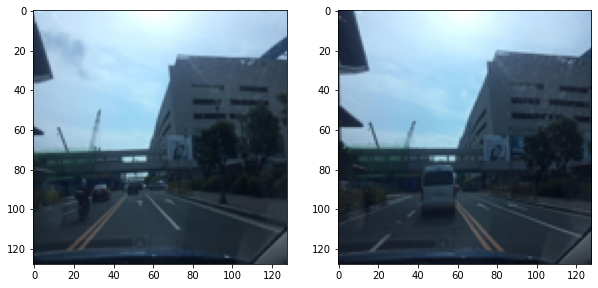

Similarity Score = [0.99501467]
SIMILAR


Press Enter to continue to the next iteration...,   q to exit:  q


In [17]:
from IPython.display import display, clear_output

for i in range(len(predictions)):
    fig, axes = plt.subplots(1,2, figsize=(10, 5))
    axes[0].imshow(testImages1_array[i])
    axes[1].imshow(testImages2_array[i])
    
    display(fig)
    print("Similarity Score =", predictions[i])
    if(predictions[i] >= 0.20):
        print("SIMILAR")
    else:
        print("DISSIMILAR")
    user_input = input("Press Enter to continue to the next iteration...,   q to exit: ")
    clear_output(wait=True)
    plt.close(fig)
    if user_input.lower() == 'q':
        break

In [28]:
binary_predictions = np.ravel((predictions > 0.2).astype(int))

correct_predictions = np.sum(binary_predictions == y_test_array)
total_predictions = len(y_test_array)

accuracy_percentage = (correct_predictions / total_predictions) * 100

print("Accuracy: {:.2f}%".format(accuracy_percentage))


Accuracy: 79.17%


## Displaying Other Evaluation Metrics

In [29]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

accuracy = accuracy_score(y_test_array, binary_predictions)
precision = precision_score(y_test_array, binary_predictions)
recall = recall_score(y_test_array, binary_predictions)
f1 = f1_score(y_test_array, binary_predictions)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.7916666666666666
Precision: 0.8913043478260869
Recall: 0.6721311475409836
F1 Score: 0.7663551401869158


# Attaching Image to each Paranaque Listing

In [30]:
base_dir = os.getcwd()

In [31]:
# data of Paranque listings
paranaque_csv_dir =  'data/newScrape'
os.chdir(paranaque_csv_dir)

In [32]:
os.getcwd()

'C:\\Users\\Sean\\Documents\\Python Notebooks\\street-image-extractor\\data\\newScrape'

In [25]:
import csv

# file = "lamudi-metro-manila_paranaque-buy.csv"
file = "Pq_compiled.csv"

# Initialize set to store unique pairs of latitude and longitude values
locations = set()

with open(file, 'r', encoding='utf-8') as file:
    reader = csv.DictReader(file)

    for row in reader:
        longitude_str = row.get('longitude')
        latitude_str = row.get('latitude')
        
        try:
            longitude = float(longitude_str)
            latitude = float(latitude_str)
        except ValueError:
            continue
    
        locations.add((latitude, longitude))
        
print("Unique Latitude and Longitude Pairs:", locations)

Unique Latitude and Longitude Pairs: {(14.5091526, 121.006287), (14.501556, 121.00197), (14.49503, 121.00533), (14.499387, 121.025633), (14.4613, 121.04508), (14.5055493, 120.99353), (14.469863, 121.04211), (14.49758, 121.03328), (14.4896303, 121.0132574), (14.49457035, 121.0053747), (14.516398, 120.989915), (14.529416, 120.997102), (14.49014402, 121.0208509), (14.46294352, 121.0245006), (14.4882898, 121.0407416), (14.447979, 121.0295), (14.509206, 120.985714), (14.49459355, 121.0057088), (14.491803, 121.038006), (14.467199, 121.024909), (14.47549564, 121.0270843), (14.4521766, 121.0245799), (14.496788, 121.043543), (14.492371, 121.008496), (14.4842221, 121.04445), (14.493719, 120.984764), (14.482705, 121.024909), (14.50036834, 121.0379509), (14.49114021, 121.0314965), (14.501183, 120.991217), (14.468547, 121.011835)}


In [26]:
os.chdir(base_dir)

In [27]:
base_dir = os.getcwd()

# Accessing the data of Paranaque images
paranaque_json_dir =  'data/json/paranaque'
os.chdir(paranaque_json_dir)

In [28]:
gdf_list = []
geojson_Count = 0

for file in os.listdir():
    if file.endswith('.geojson'):
        gdf = gpd.read_file(file)
        geojson_Count += 1
        
        # filter out null json files
        if '"features": []' not in gdf:
            gdf = gpd.read_file(file)
            gdf_list.append(gdf)

In [29]:
if gdf_list:
    merged_gdf = gpd.GeoDataFrame(pd.concat(gdf_list, ignore_index=True), crs=gdf_list[0].crs)
    
    img_urls = merged_gdf["thumb_2048_url"]
    coordinates = merged_gdf["geometry"]
else:
    print("No GeoJSON files with features found.")

In [33]:
os.chdir(base_dir)

In [34]:
os.getcwd()

'C:\\Users\\Sean\\Documents\\Python Notebooks\\street-image-extractor'

In [32]:
merged_gdf = gpd.GeoDataFrame(pd.concat(gdf_list, ignore_index=True), crs=gdf_list[0].crs)

In [33]:
img_urls = merged_gdf["thumb_2048_url"]
img_urls = img_urls.to_numpy()
num_digits = len(str(len(img_urls)))

### Collect closest image for each Paranaque listing 

In [35]:
from geopy.distance import distance
import csv
from IPython.display import display, Image
import requests

start_index = 0 

paranaque_nearest_images_all = []
ctr = 1

for location in locations:
    
    lat, long = location
    paranaque_nearest_images = []

    current_lat = lat
    current_long = long

    for i, img_url in enumerate(img_urls[start_index:], start=start_index):
        coord = (coordinates[i].x, coordinates[i].y)

        if not img_url:
            continue

        if None in coord:
            continue

        dist = distance((lat, long), (coord[1], coord[0])).kilometers

        if len(paranaque_nearest_images) < 1 or dist < paranaque_nearest_images[-1][0]:
            try:
                response = requests.head(img_url)
                if response.status_code != 200:
                    # Skip this URL if it's not valid
                    continue
            except requests.RequestException as e:
                print("Error:", e)
                continue

            try:
                response.raise_for_status()
            except requests.exceptions.HTTPError as err:
                if "URL signature mismatch" in str(err):
                    print("URL signature mismatch:", img_url)
                    continue

            if img_url in [url for (_, _, url) in paranaque_nearest_images]:
                continue
                
            for j, (d, _, _) in enumerate(paranaque_nearest_images):
                if dist < d:
                    paranaque_nearest_images.insert(j, (dist, coord, img_url))
                    break
            else:
                paranaque_nearest_images.append((dist, coord, img_url))

            if len(paranaque_nearest_images) > 1:
                paranaque_nearest_images.pop()
    
    paranaque_nearest_images_with_coordinates = {
        'lat': current_lat,
        'long': current_long,
        'images': paranaque_nearest_images
    }
    paranaque_nearest_images_all.append(paranaque_nearest_images_with_coordinates)
    
    print(f"COORDINATE {ctr}")
    for i, (dist, coord, img_url) in enumerate(paranaque_nearest_images, start=1):
        print(f"Image {i}:")
        print(f"  URL: {img_url}")
        print(f"  Coordinates: {coord}")
        print(f"  Distance: {dist} kilometers")
        
    ctr+=1
    print(f"Current Latitude: {current_lat}, Longitude: {current_long}")
    print("---------------------------------------------------------------------------------------------------")


COORDINATE 1
Image 1:
  URL: https://scontent.fmnl17-5.fna.fbcdn.net/m1/v/t6/An9EZ1SpxW4vxyGklnATMeAa2Zfj8QoHStlwHQ_FAmQyvkX0p78xpCx6Rfx1AcLsJ-s6Qwo_r44W4vvDxLnfRhK4pwWDT7D3_wozgYw13eVKt1lCDDLUabAHicY8Ds_8tyL4O-bFO3ghvtvtWJuPlg?stp=s2048x1152&ccb=10-5&oh=00_AfBpjExQpM2_PFusb5LnAujyztX8xIm4ZEI4augIPRJhTQ&oe=665C2289&_nc_sid=201bca
  Coordinates: (121.004342, 14.508146)
  Distance: 0.23740206909461253 kilometers
Current Latitude: 14.5091526, Longitude: 121.006287
---------------------------------------------------------------------------------------------------
COORDINATE 2
Image 1:
  URL: https://scontent.fmnl17-5.fna.fbcdn.net/m1/v/t6/An-T7BPvABT2EJYHDDDS-l7ApXQ42A-RFbkrb49O94thRd_AW9bPXpzFgcApETujDc1vNM2qEASjggI_nJ8ZRuduuTYo7AMq6ciJNsnt1F021v3WjX9I_Rs3-4CkP860xdvdTjq9j5Kg7PIjQUX-3A?stp=s2048x1152&ccb=10-5&oh=00_AfBV5zfRf6ZpmMy82H-UDoT_0Jf3W-xQMLr9KUNKDf9Ksw&oe=665C33BC&_nc_sid=201bca
  Coordinates: (120.99927, 14.503182)
  Distance: 0.34216208520700175 kilometers
Current Latitude: 14.

In [41]:
print(len(locations))

31


In [41]:
base_dir = os.getcwd()

In [42]:
os.chdir("data/newScrape")
os.getcwd()

'C:\\Users\\Sean\\Documents\\Python Notebooks\\street-image-extractor\\data\\newScrape'

In [46]:
import pandas as pd

df = pd.read_csv("Pq_compiled.csv")

# Drop rows with null or missing latitude/longitude values
df.dropna(subset=['latitude', 'longitude'], inplace=True)
df = df[(df['latitude'] != 'None') & (df['longitude'] != 'None')]

df.to_csv("filtered_Pq_compiled.csv", index=False)

In [48]:
import csv

existing_csv_file = "filtered_Pq_compiled.csv"
new_csv_file = 'Pq_with_images.csv'


max_images = max(len(item['images']) for item in paranaque_nearest_images_all)

fieldnames = reader.fieldnames + ['link'] + [f'img_url_{i}' for i in range(1, max_images + 1)] + \
             [f'coordinates_{i}' for i in range(1, max_images + 1)] + \
             [f'distance_{i}' for i in range(1, max_images + 1)]

with open(existing_csv_file, 'r', newline='', encoding='utf-8') as f:
    reader = csv.DictReader(f)
    
    with open(new_csv_file, 'w', newline='', encoding='utf-8') as new_f:
        writer = csv.DictWriter(new_f, fieldnames=fieldnames)
        writer.writeheader()
        
        for row in reader:
            if row['latitude'] and row['longitude']:
                lat = float(row['latitude'])
                long = float(row['longitude'])        

                match_found = False
                for item in paranaque_nearest_images_all:
                    if item['lat'] == lat and item['long'] == long:
                        match_found = True
                       
                        images = item['images']
                        for i, (dist, coord, img_url) in enumerate(images, start=1):
                            row[f'img_url_{i}'] = img_url
                            row[f'coordinates_{i}'] = coord
                            row[f'distance_{i}'] = dist
                        
                if match_found:
                    writer.writerow(row)
                else:
                    print(f"No matching images found for latitude {lat} and longitude {long}.")
            else:
                print("Latitude or longitude value is empty, skipping the row.")

print("CSV file updated successfully!")

CSV file updated successfully!


In [48]:
os.chdir(base_dir)

## PARANAQUE RENT

In [49]:
base_dir = os.getcwd()

In [50]:
# Accessing the data of Paranque images
paranaque_csv_dir =  'data/LamudiScraping'
os.chdir(paranaque_csv_dir)

In [51]:
os.getcwd()

'C:\\Users\\Sean\\Documents\\Python Notebooks\\street-image-extractor\\data\\LamudiScraping'

In [52]:
import csv

file = "lamudi-metro-manila_paranaque-rent.csv"

locations = set()

# Open the CSV file
with open(file, 'r', encoding='utf-8') as file:
    reader = csv.DictReader(file)
    
    for row in reader:
        longitude_str = row.get('longitude')
        latitude_str = row.get('latitude')

        try:
            longitude = float(longitude_str)
            latitude = float(latitude_str)
        except ValueError:
            continue

        locations.add((latitude, longitude))

print("Unique Latitude and Longitude Pairs:", locations)

Unique Latitude and Longitude Pairs: {(14.509206, 120.985714), (14.5091526, 121.006287), (14.491803, 121.038006), (14.501556, 121.00197), (14.482705, 121.024909), (14.499387, 121.025633), (14.516398, 120.989915), (14.467199, 121.024909), (14.4464492, 121.0362973), (14.529416, 120.997102), (14.4521766, 121.0245799), (14.501183, 120.991217), (14.469863, 121.04211), (14.496788, 121.043543), (14.492371, 121.008496), (14.468547, 121.011835), (14.493719, 120.984764)}


In [53]:
os.chdir(base_dir)

In [54]:
base_dir = os.getcwd()
# Accessing the data of Paranque images
paranaque_json_dir =  'data/json/paranaque'
os.chdir(paranaque_json_dir)


In [55]:
gdf_list = []
geojson_Count = 0

for file in os.listdir():
    if file.endswith('.geojson'):
        gdf = gpd.read_file(file)
        geojson_Count += 1
        
        if '"features": []' not in gdf:
            gdf = gpd.read_file(file)
            gdf_list.append(gdf)
            

In [56]:
if gdf_list:
    merged_gdf = gpd.GeoDataFrame(pd.concat(gdf_list, ignore_index=True), crs=gdf_list[0].crs)
    
    img_urls = merged_gdf["thumb_2048_url"]
    coordinates = merged_gdf["geometry"]
else:
    print("No GeoJSON files with features found.")

In [57]:
os.chdir(base_dir)

In [58]:
os.getcwd()

'C:\\Users\\Sean\\Documents\\Python Notebooks\\street-image-extractor'

In [59]:
merged_gdf = gpd.GeoDataFrame(pd.concat(gdf_list, ignore_index=True), crs=gdf_list[0].crs)

In [60]:
img_urls = merged_gdf["thumb_2048_url"]
img_urls = img_urls.to_numpy()
num_digits = len(str(len(img_urls)))

In [61]:
from geopy.distance import distance
import csv
from IPython.display import display, Image
import requests

start_index = 0 

paranaque_rent_nearest_images_all = []
ctr = 1

for location in locations:
    lat, long = location
    paranaque_rent_nearest_images = []

    current_lat = lat
    current_long = long

    for i, img_url in enumerate(img_urls[start_index:], start=start_index):
        coord = (coordinates[i].x, coordinates[i].y)

        if not img_url:
            continue

        if None in coord:
            continue

        dist = distance((lat, long), (coord[1], coord[0])).kilometers

        if len(paranaque_rent_nearest_images) < 5 or dist < paranaque_rent_nearest_images[-1][0]:
            # Check if the URL is valid
            try:
                response = requests.head(img_url)
                if response.status_code != 200:
                    continue
            except requests.RequestException as e:
                print("Error:", e)
                continue

            try:
                response.raise_for_status()
            except requests.exceptions.HTTPError as err:
                if "URL signature mismatch" in str(err):
                    print("URL signature mismatch:", img_url)
                    continue

            if img_url in [url for (_, _, url) in paranaque_rent_nearest_images]:
                continue

            for j, (d, _, _) in enumerate(paranaque_rent_nearest_images):
                if dist < d:
                    paranaque_rent_nearest_images.insert(j, (dist, coord, img_url))
                    break
            else:
                paranaque_rent_nearest_images.append((dist, coord, img_url))

            # Keep only the 5 nearest images
            if len(paranaque_rent_nearest_images) > 5:
                paranaque_rent_nearest_images.pop()


    paranaque_rent_nearest_images_with_coordinates = {
        'lat': current_lat,
        'long': current_long,
        'images': paranaque_rent_nearest_images
    }
    paranaque_rent_nearest_images_all.append(paranaque_rent_nearest_images_with_coordinates)
    
    print(f"COORDINATE {ctr}")
    for i, (dist, coord, img_url) in enumerate(paranaque_rent_nearest_images, start=1):
        print(f"Image {i}:")
        print(f"  URL: {img_url}")
        print(f"  Coordinates: {coord}")
        print(f"  Distance: {dist} kilometers")
        
    ctr+=1
    print(f"Current Latitude: {current_lat}, Longitude: {current_long}")
    print("---------------------------------------------------------------------------------------------------")


COORDINATE 1
Image 1:
  URL: https://scontent.fmnl17-4.fna.fbcdn.net/m1/v/t6/An9nvHlNLIs7ScYrfsZu85cXQywDAVQOf6-iq7P-Ehg6eBuKGlCLD2ma5v1qkiwo5wBPLJezr7ms5xNmS03LPSWL5Jv6n26lnJ1pr9PClT97Ll5iyEzeNNf1fizkKv8_rW2W28h20uNpKn2aBtz-vQ?stp=s2048x1536&ccb=10-5&oh=00_AfC0cV_lcx71y_4vvfPEnTRuAJ5gjMV4KA2kwWQZ7tKsaQ&oe=660E047E&_nc_sid=201bca
  Coordinates: (120.984797, 14.507326)
  Distance: 0.23030176515813852 kilometers
Image 2:
  URL: https://scontent.fmnl17-4.fna.fbcdn.net/m1/v/t6/An8TZgWRcX-sRceDLvBpZKK_q-czAsLPuUJeA1dE-Yf9w-mc6qe5d3UygndmYTyZB2Qtti6sSgdHB3o3Umd0diPs5nCho2aidHMihxhqjTQTXuTtQtbGz21p33g73xo8H-X-3NYj-vqNz4j_AV5DIA?stp=s2048x1536&ccb=10-5&oh=00_AfCYyd3ULJ5FBbxn1advtR7JH_9NZLXBvlQ4O6yOlHcxOQ&oe=660DF190&_nc_sid=201bca
  Coordinates: (120.985039, 14.507222)
  Distance: 0.23126177837964967 kilometers
Image 3:
  URL: https://scontent.fmnl17-4.fna.fbcdn.net/m1/v/t6/An-f79fMjYuKv5qP1dmwjdyl_wQ1dOZ2wIyohqTIBBxZDMyLdQLgx5Ly1BhFiAITNwuNf1P_2VbmMqW3rGMvfJ18J40QvfX3a3idzV0tnkvlhw98nJcv3ob05

In [62]:
base_dir = os.getcwd()

In [63]:
os.chdir("data/LamudiScraping")
os.getcwd()

'C:\\Users\\Sean\\Documents\\Python Notebooks\\street-image-extractor\\data\\LamudiScraping'

In [64]:
import pandas as pd

df = pd.read_csv("lamudi-metro-manila_paranaque-rent.csv")

df.dropna(subset=['latitude', 'longitude'], inplace=True)

In [65]:
import csv

existing_csv_file = 'lamudi-metro-manila_paranaque-rent.csv'
new_csv_file = 'paranaque_rent_test.csv'

max_images = max(len(item['images']) for item in paranaque_rent_nearest_images_all)

fieldnames = reader.fieldnames + [f'img_url_{i}' for i in range(1, max_images + 1)] + \
             [f'coordinates_{i}' for i in range(1, max_images + 1)] + \
             [f'distance_{i}' for i in range(1, max_images + 1)]

with open(existing_csv_file, 'r', newline='', encoding='utf-8') as f:
    reader = csv.DictReader(f)
    
    with open(new_csv_file, 'w', newline='', encoding='utf-8') as new_f:
        writer = csv.DictWriter(new_f, fieldnames=fieldnames)
        writer.writeheader()
        
        for row in reader:
            if row['latitude'] and row['longitude']:
                lat = float(row['latitude'])
                long = float(row['longitude'])        
            
                match_found = False
                for item in paranaque_rent_nearest_images_all:
                    
                    if item['lat'] == lat and item['long'] == long:
                        match_found = True
                        images = item['images']
                        for i, (dist, coord, img_url) in enumerate(images, start=1):
                            row[f'img_url_{i}'] = img_url
                            row[f'coordinates_{i}'] = coord
                            row[f'distance_{i}'] = dist
                        
                if match_found:
                    writer.writerow(row)
                else:
                    print(f"No matching images found for latitude {lat} and longitude {long}.")
            else:
                print("Latitude or longitude value is empty, skipping the row.")

print("CSV file updated successfully!")


Latitude or longitude value is empty, skipping the row.
Latitude or longitude value is empty, skipping the row.
Latitude or longitude value is empty, skipping the row.
Latitude or longitude value is empty, skipping the row.
Latitude or longitude value is empty, skipping the row.
Latitude or longitude value is empty, skipping the row.
Latitude or longitude value is empty, skipping the row.
Latitude or longitude value is empty, skipping the row.
Latitude or longitude value is empty, skipping the row.
Latitude or longitude value is empty, skipping the row.
Latitude or longitude value is empty, skipping the row.
Latitude or longitude value is empty, skipping the row.
Latitude or longitude value is empty, skipping the row.
Latitude or longitude value is empty, skipping the row.
Latitude or longitude value is empty, skipping the row.
Latitude or longitude value is empty, skipping the row.
Latitude or longitude value is empty, skipping the row.
Latitude or longitude value is empty, skipping t

In [66]:
os.chdir(base_dir)

## Getting Image from Pasig Scraping

In [49]:
base_dir = os.getcwd()

In [51]:
os.getcwd()

'C:\\Users\\Sean\\Documents\\Python Notebooks\\street-image-extractor\\data\\newScrape'

In [50]:
# Accessing the data of Pasig Listings
pasig_csv_dir = 'data/newScrape'
os.chdir(pasig_csv_dir)

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'data/newScrape'

In [54]:
import csv

# file = "lamudi-metro-manila_pasig-buy.csv"
file = "Pasig_compiled.csv"

# Initialize set to store unique pairs of latitude and longitude values
locations = set()

# Open the CSV file
with open(file, 'r', encoding='utf-8') as file:
    reader = csv.DictReader(file)
    
    for row in reader:
        longitude_str = row.get('longitude')
        latitude_str = row.get('latitude')
        
        try:
            longitude = float(longitude_str)
            latitude = float(latitude_str)
        except ValueError:
            # Skip
            continue

        locations.add((latitude, longitude))

print("Unique Latitude and Longitude Pairs:", locations)

Unique Latitude and Longitude Pairs: {(14.57588, 121.07145), (14.581673, 121.068596), (14.59856697, 121.0818004), (14.620333, 121.089738), (14.582707, 121.061458), (14.5724405, 121.0675488), (14.605396, 121.081903), (14.57610077, 121.0652504), (14.56362, 121.085818), (14.555413, 121.080087), (14.575822, 121.064324), (14.57424756, 121.0655187), (14.590053, 121.081755), (14.567197, 121.092265), (14.571885, 121.077937), (14.57568, 121.0625), (14.560507, 121.073997), (14.569208, 121.060157), (14.563799, 121.075788), (14.587278, 121.074355), (14.594486, 121.08381), (14.69834272, 121.0545298), (14.55109359, 121.0816552), (14.613073, 121.087967), (14.5739038, 121.0775612), (14.583952, 121.101245), (14.57067, 121.05968), (14.588464, 121.089097), (14.61956, 121.09684), (14.565391, 121.06934), (14.55578, 121.097561), (14.559501, 121.078654), (14.556254, 121.074355), (14.583771, 121.059675), (14.552166, 121.075788), (14.56866, 121.06215), (14.612889, 121.097996), (14.6118924, 121.1058646), (14.58

In [55]:
os.chdir(base_dir)

In [79]:
os.getcwd()

'C:\\Users\\Sean\\Documents\\Python Notebooks\\street-image-extractor'

In [78]:
# go back directory if needed
os.chdir('..')

In [77]:
base_dir = os.getcwd()
# Accessing the data of pasig images
pasig_json_dir =  'data/json/pasig'
os.chdir(pasig_json_dir)

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'data/json/pasig'

In [63]:
gdf_list = []
geojson_Count = 0

for file in os.listdir():
    if file.endswith('.geojson'):
        gdf = gpd.read_file(file)
        geojson_Count += 1
        
        # filter out null json files
        if '"features": []' not in gdf:
            gdf = gpd.read_file(file)
            gdf_list.append(gdf)
            

In [64]:
if gdf_list:
    merged_gdf = gpd.GeoDataFrame(pd.concat(gdf_list, ignore_index=True), crs=gdf_list[0].crs)
    
    img_urls = merged_gdf["thumb_2048_url"]
    coordinates = merged_gdf["geometry"]
else:
    print("No GeoJSON files with features found.")

In [65]:
os.chdir(base_dir)

In [66]:
merged_gdf = gpd.GeoDataFrame(pd.concat(gdf_list, ignore_index=True), crs=gdf_list[0].crs)

In [67]:
img_urls = merged_gdf["thumb_2048_url"]
img_urls = img_urls.to_numpy()
num_digits = len(str(len(img_urls)))

In [70]:
from geopy.distance import distance
import csv
from IPython.display import display, Image
import requests

start_index = 0 

pasig_nearest_images_all = []
ctr = 1

for location in locations:
    lat, long = location
    pasig_nearest_images = []

    current_lat = lat
    current_long = long

    for i, img_url in enumerate(img_urls[start_index:], start=start_index):
        coord = (coordinates[i].x, coordinates[i].y)

        if not img_url:
            continue

        if None in coord:
            continue

        dist = distance((lat, long), (coord[1], coord[0])).kilometers
    
        # If less than N number of images 
        if len(pasig_nearest_images) < 1 or dist < pasig_nearest_images[-1][0]:
            try:
                response = requests.head(img_url)
                if response.status_code != 200:
                    continue
            except requests.RequestException as e:
                print("Error:", e)
                continue

            try:
                response.raise_for_status()
            except requests.exceptions.HTTPError as err:
                if "URL signature mismatch" in str(err):
                    print("URL signature mismatch:", img_url)
                    continue

            if img_url in [url for (_, _, url) in pasig_nearest_images]:
                continue

            for j, (d, _, _) in enumerate(pasig_nearest_images):
                if dist < d:
                    pasig_nearest_images.insert(j, (dist, coord, img_url))
                    break
            else:
                pasig_nearest_images.append((dist, coord, img_url))

            # Num of nearest images to save 
            if len(pasig_nearest_images) > 1:
                pasig_nearest_images.pop()


    pasig_nearest_images_with_coordinates = {
        'lat': current_lat,
        'long': current_long,
        'images': pasig_nearest_images
    }
    pasig_nearest_images_all.append(pasig_nearest_images_with_coordinates)
    
    print(f"COORDINATE {ctr}")
    for i, (dist, coord, img_url) in enumerate(pasig_nearest_images, start=1):
        print(f"Image {i}:")
        print(f"  URL: {img_url}")
        print(f"  Coordinates: {coord}")
        print(f"  Distance: {dist} kilometers")
        
    ctr+=1

    print(f"Current Latitude: {current_lat}, Longitude: {current_long}")
    print("---------------------------------------------------------------------------------------------------")

COORDINATE 1
Image 1:
  URL: https://scontent.fmnl17-5.fna.fbcdn.net/m1/v/t6/An-gN0v4V4aO8dF3Oc12QqXhN7xlVIphzzunEO3YzWr8kjQp0h-05bAcBvSMPYxs9qous3y6-A7CAcv9lz-P4OZg5BBjFOcsHDiNn1Gua9d5C4O16XDCfCjuMbBZhGpVJMZgl6S_2VPYYPJWjAaGkw?stp=s2048x1152&ccb=10-5&oh=00_AfDl1jy6gzS8AUDy2eMecni3-0TBMc4AKL4CQqwK2dtx3g&oe=665C4FAA&_nc_sid=201bca
  Coordinates: (121.072477, 14.575617)
  Distance: 0.11443092291860034 kilometers
Current Latitude: 14.57588, Longitude: 121.07145
---------------------------------------------------------------------------------------------------
COORDINATE 2
Image 1:
  URL: https://scontent.fmnl17-5.fna.fbcdn.net/m1/v/t6/An9IYmdbtgL11Gr-bp77rOQQarY5KNs3BoatT7Afq_uir_Z3uruR8KFA7wzwd6ePq1VILgv_tjLqSA2QJR_3Jeb5kXwlpF8asAnwZ-2wnWabhvo6DE5d8cH01v9_R_s7KLF16W2NN4XzvbJXlqPesw?stp=s2048x1536&ccb=10-5&oh=00_AfCJg_xzjtnuX40a-K38lSHTLDNJROZr-99J42iU3BRtnA&oe=665C562A&_nc_sid=201bca
  Coordinates: (121.0706, 14.581442)
  Distance: 0.21745189082682734 kilometers
Current Latitude: 14.5816

In [82]:
print("done")

done


In [72]:
for item in pasig_nearest_images_all:
    print(f"Latitude: {item['lat']}, Longitude: {item['long']}")
    print("Nearest Images:")
    for i, (dist, coord, img_url) in enumerate(item['images'], start=1):
        print(f"  Image {i}:")
        print(f"    URL: {img_url}")
        print(f"    Coordinates: {coord}")
        print(f"    Distance: {dist} kilometers")
    print("---------------------------------------------------------------------------------------------------\n")


Latitude: 14.57588, Longitude: 121.07145
Nearest Images:
  Image 1:
    URL: https://scontent.fmnl17-5.fna.fbcdn.net/m1/v/t6/An-gN0v4V4aO8dF3Oc12QqXhN7xlVIphzzunEO3YzWr8kjQp0h-05bAcBvSMPYxs9qous3y6-A7CAcv9lz-P4OZg5BBjFOcsHDiNn1Gua9d5C4O16XDCfCjuMbBZhGpVJMZgl6S_2VPYYPJWjAaGkw?stp=s2048x1152&ccb=10-5&oh=00_AfDl1jy6gzS8AUDy2eMecni3-0TBMc4AKL4CQqwK2dtx3g&oe=665C4FAA&_nc_sid=201bca
    Coordinates: (121.072477, 14.575617)
    Distance: 0.11443092291860034 kilometers
---------------------------------------------------------------------------------------------------

Latitude: 14.581673, Longitude: 121.068596
Nearest Images:
  Image 1:
    URL: https://scontent.fmnl17-5.fna.fbcdn.net/m1/v/t6/An9IYmdbtgL11Gr-bp77rOQQarY5KNs3BoatT7Afq_uir_Z3uruR8KFA7wzwd6ePq1VILgv_tjLqSA2QJR_3Jeb5kXwlpF8asAnwZ-2wnWabhvo6DE5d8cH01v9_R_s7KLF16W2NN4XzvbJXlqPesw?stp=s2048x1536&ccb=10-5&oh=00_AfCJg_xzjtnuX40a-K38lSHTLDNJROZr-99J42iU3BRtnA&oe=665C562A&_nc_sid=201bca
    Coordinates: (121.0706, 14.581442)
    Distance

In [80]:
base_dir = os.getcwd()

In [81]:
os.chdir("data/newScrape")
os.getcwd()

'C:\\Users\\Sean\\Documents\\Python Notebooks\\street-image-extractor\\data\\newScrape'

In [83]:
import pandas as pd

# df = pd.read_csv("lamudi-metro-manila_pasig-buy.csv")
df = pd.read_csv("Pasig_compiled.csv")

# Drop rows with null or missing latitude/longitude values
df.dropna(subset=['latitude', 'longitude'], inplace=True)
df = df[(df['latitude'] != 'None') & (df['longitude'] != 'None')]

df.to_csv("filtered_Pasig_compiled.csv", index=False)

C:\Users\Sean\AppData\Local\Temp\ipykernel_1412\956474406.py:8: DtypeWarning: Columns (23,26,27,38,39,40,53,134) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Pasig_compiled.csv")


In [86]:
import csv

existing_csv_file = "filtered_Pasig_compiled.csv"
new_csv_file = 'Pasig_with_images.csv'

# # Load existing CSV file and create a new CSV file for writing
# existing_csv_file = 'lamudi-metro-manila_pasig-buy.csv'
# new_csv_file = 'pasig_buy_test.csv'

max_images = max(len(item['images']) for item in pasig_nearest_images_all)

# Generate fieldnames based on the maximum number of images
fieldnames = reader.fieldnames + ['link'] + [f'img_url_{i}' for i in range(1, max_images + 1)] + \
             [f'coordinates_{i}' for i in range(1, max_images + 1)] + \
             [f'distance_{i}' for i in range(1, max_images + 1)]

with open(existing_csv_file, 'r', newline='', encoding='utf-8') as f:
    reader = csv.DictReader(f)
    
    with open(new_csv_file, 'w', newline='', encoding='utf-8') as new_f:
        writer = csv.DictWriter(new_f, fieldnames=fieldnames)
        writer.writeheader()
        
        for row in reader:
            if row['latitude'] and row['longitude']:
                lat = float(row['latitude'])
                long = float(row['longitude'])        
            
                match_found = False
                for item in pasig_nearest_images_all:
                    if item['lat'] == lat and item['long'] == long:
                        match_found = True
                        images = item['images']
                        for i, (dist, coord, img_url) in enumerate(images, start=1):
                            row[f'img_url_{i}'] = img_url
                            row[f'coordinates_{i}'] = coord
                            row[f'distance_{i}'] = dist
                        
                if match_found:
                    writer.writerow(row)
                else:
                    print(f"No matching images found for latitude {lat} and longitude {long}.")
            else:
                print("Latitude or longitude value is empty, skipping the row.")

print("CSV file updated successfully!")


CSV file updated successfully!


In [85]:
print("test")

test


In [87]:
os.chdir(base_dir)

In [88]:
os.getcwd()

'C:\\Users\\Sean\\Documents\\Python Notebooks\\street-image-extractor'

## pasig rent

In [67]:
base_dir = os.getcwd()

In [68]:
# Accessing the data of Paranque Listings
pasig_csv_dir =  'data/LamudiScraping'
os.chdir(pasig_csv_dir)

In [69]:
import csv

file = "lamudi-metro-manila_pasig-rent.csv"

# Initialize set to store unique pairs of latitude and longitude values
locations = set()

with open(file, 'r', encoding='utf-8') as file:
    reader = csv.DictReader(file)
    
    for row in reader:
        longitude_str = row.get('longitude')
        latitude_str = row.get('latitude')
        
        try:
            longitude = float(longitude_str)
            latitude = float(latitude_str)
        except ValueError:
            continue
        
        locations.add((latitude, longitude))

print("Unique Latitude and Longitude Pairs:", locations)

Unique Latitude and Longitude Pairs: {(14.548791, 121.086626), (14.582707, 121.061458), (14.56362, 121.085818), (14.555413, 121.080087), (14.575822, 121.064324), (14.590053, 121.081755), (14.567197, 121.092265), (14.571885, 121.077937), (14.569208, 121.060157), (14.563799, 121.075788), (14.587278, 121.074355), (14.613073, 121.087967), (14.583952, 121.101245), (14.588464, 121.089097), (14.565391, 121.06934), (14.55578, 121.097561), (14.583771, 121.059675), (14.552166, 121.075788), (14.612889, 121.097996), (14.590946, 121.075788), (14.571957, 121.058764), (14.604707, 121.092082), (14.601887, 121.093698), (14.5780366, 121.072383), (14.563646, 121.063607), (14.582943, 121.072573), (14.582317, 121.072923), (14.549724, 121.0977), (14.576282, 121.085049)}


In [70]:
os.chdir(base_dir)

In [71]:
base_dir = os.getcwd()
# Accessing the data of Pasig images
pasig_json_dir =  'data/json/pasig'
os.chdir(pasig_json_dir)

In [72]:
gdf_list = []
geojson_Count = 0

for file in os.listdir():
    if file.endswith('.geojson'):
        gdf = gpd.read_file(file)
        geojson_Count += 1
        
        # filter out null json files
        if '"features": []' not in gdf:
            gdf = gpd.read_file(file)
            gdf_list.append(gdf)
            

In [73]:
if gdf_list:
    merged_gdf = gpd.GeoDataFrame(pd.concat(gdf_list, ignore_index=True), crs=gdf_list[0].crs)
    
    img_urls = merged_gdf["thumb_2048_url"]
    coordinates = merged_gdf["geometry"]
else:
    print("No GeoJSON files with features found.")

In [74]:
os.chdir(base_dir)

In [75]:
merged_gdf = gpd.GeoDataFrame(pd.concat(gdf_list, ignore_index=True), crs=gdf_list[0].crs)

In [76]:
img_urls = merged_gdf["thumb_2048_url"]
img_urls = img_urls.to_numpy()
num_digits = len(str(len(img_urls)))

In [78]:
from geopy.distance import distance
import csv
from IPython.display import display, Image
import requests

start_index = 0 

pasig_rent_nearest_images_all = []
ctr = 1

for location in locations:
    lat, long = location
    pasig_rent_nearest_images = []

    current_lat = lat
    current_long = long

    for i, img_url in enumerate(img_urls[start_index:], start=start_index):
        coord = (coordinates[i].x, coordinates[i].y)

        if not img_url:
            continue

        if None in coord:
            continue

        dist = distance((lat, long), (coord[1], coord[0])).kilometers

        # if less than 5 images in the list or if the current distance is less than largest distance in the list
        if len(pasig_rent_nearest_images) < 5 or dist < pasig_rent_nearest_images[-1][0]:
            try:
                response = requests.head(img_url)
                if response.status_code != 200:
                    continue
            except requests.RequestException as e:
                print("Error:", e)
                continue

            try:
                response.raise_for_status()
            except requests.exceptions.HTTPError as err:
                if "URL signature mismatch" in str(err):
                    print("URL signature mismatch:", img_url)
                    continue

            if img_url in [url for (_, _, url) in pasig_rent_nearest_images]:
                continue

            for j, (d, _, _) in enumerate(pasig_rent_nearest_images):
                if dist < d:
                    pasig_rent_nearest_images.insert(j, (dist, coord, img_url))
                    break
            else:
                pasig_rent_nearest_images.append((dist, coord, img_url))

            # Keep only the 5 nearest images
            if len(pasig_rent_nearest_images) > 5:
                pasig_rent_nearest_images.pop()

    pasig_rent_nearest_images_with_coordinates = {
        'lat': current_lat,
        'long': current_long,
        'images': pasig_rent_nearest_images
    }
    pasig_rent_nearest_images_all.append(pasig_rent_nearest_images_with_coordinates)
    
    print(f"COORDINATE {ctr}")
    for i, (dist, coord, img_url) in enumerate(pasig_rent_nearest_images, start=1):
        print(f"Image {i}:")
        print(f"  URL: {img_url}")
        print(f"  Coordinates: {coord}")
        print(f"  Distance: {dist} kilometers")
        
    ctr+=1
    print(f"Current Latitude: {current_lat}, Longitude: {current_long}")
    print("---------------------------------------------------------------------------------------------------")


COORDINATE 1
Image 1:
  URL: https://scontent.fmnl17-4.fna.fbcdn.net/m1/v/t6/An_9R7zKGLbncpvSWUDZ0ADvHPdGL6zBO4FDiAnPmlJ5ndTYFnpoq4LMjQq3PK0Qb4hhvDsBmV7EZ9QwMuBravzdkO6KvVM7Sbhe1JVQ0jVULIB6kLDZ7UL9M1rPrLdi3RVDNVGfFJU3wD1Es6cLWw?stp=s2048x1152&ccb=10-5&oh=00_AfCwXp4po40P-cDXAzBIetEj2XBLZi1B8EaqEVv8STcpcA&oe=660D3685&_nc_sid=201bca
  Coordinates: (121.086634, 14.548788)
  Distance: 0.0009238704743145229 kilometers
Image 2:
  URL: https://scontent.fmnl17-4.fna.fbcdn.net/m1/v/t6/An858rxOBdzwwguHo0HiVyfKa-6BOpNryMtUI1JqMlXmyx5XKcc4CwL10A2wL56279BgpmSRwwU1B2wgWxN3YenV-NmeQFHPPX1T7LRMyHuUnFgXbuNvEaY9LqliwFZ3xg1ZQN6dPVAPUFDj0m4ESw?stp=s2048x1152&ccb=10-5&oh=00_AfCmkBK9IHIUP5zkRSUaS2mJkfXlqKhsJEYR5dLuXQELKA&oe=660CFFA4&_nc_sid=201bca
  Coordinates: (121.086621, 14.548798)
  Distance: 0.0009435256154647668 kilometers
Image 3:
  URL: https://scontent.fmnl17-4.fna.fbcdn.net/m1/v/t6/An84zlUHklA06x5JsOa3isCkUH-CdvgdhxT6W86QfQucpgrbxCgC8S9RuGnjkRPzwgaf5vJaDZvDw_gDKf4Adj3p_T2uLcCvCXYVt7kaYu3Rl-GFc7eDH

In [81]:
for item in pasig_rent_nearest_images_all:
    print(f"Latitude: {item['lat']}, Longitude: {item['long']}")
    print("Nearest Images:")
    for i, (dist, coord, img_url) in enumerate(item['images'], start=1):
        print(f"  Image {i}:")
        print(f"    URL: {img_url}")
        print(f"    Coordinates: {coord}")
        print(f"    Distance: {dist} kilometers")
    print("---------------------------------------------------------------------------------------------------\n")

Latitude: 14.548791, Longitude: 121.086626
Nearest Images:
  Image 1:
    URL: https://scontent.fmnl17-4.fna.fbcdn.net/m1/v/t6/An_9R7zKGLbncpvSWUDZ0ADvHPdGL6zBO4FDiAnPmlJ5ndTYFnpoq4LMjQq3PK0Qb4hhvDsBmV7EZ9QwMuBravzdkO6KvVM7Sbhe1JVQ0jVULIB6kLDZ7UL9M1rPrLdi3RVDNVGfFJU3wD1Es6cLWw?stp=s2048x1152&ccb=10-5&oh=00_AfCwXp4po40P-cDXAzBIetEj2XBLZi1B8EaqEVv8STcpcA&oe=660D3685&_nc_sid=201bca
    Coordinates: (121.086634, 14.548788)
    Distance: 0.0009238704743145229 kilometers
  Image 2:
    URL: https://scontent.fmnl17-4.fna.fbcdn.net/m1/v/t6/An858rxOBdzwwguHo0HiVyfKa-6BOpNryMtUI1JqMlXmyx5XKcc4CwL10A2wL56279BgpmSRwwU1B2wgWxN3YenV-NmeQFHPPX1T7LRMyHuUnFgXbuNvEaY9LqliwFZ3xg1ZQN6dPVAPUFDj0m4ESw?stp=s2048x1152&ccb=10-5&oh=00_AfCmkBK9IHIUP5zkRSUaS2mJkfXlqKhsJEYR5dLuXQELKA&oe=660CFFA4&_nc_sid=201bca
    Coordinates: (121.086621, 14.548798)
    Distance: 0.0009435256154647668 kilometers
  Image 3:
    URL: https://scontent.fmnl17-4.fna.fbcdn.net/m1/v/t6/An84zlUHklA06x5JsOa3isCkUH-CdvgdhxT6W86QfQucpgrbxCg

In [82]:
base_dir = os.getcwd()

In [83]:
os.chdir("data/LamudiScraping")
os.getcwd()

'C:\\Users\\Sean\\Documents\\Python Notebooks\\street-image-extractor\\data\\LamudiScraping'

In [84]:
import pandas as pd

# Load your data into a DataFrame
df = pd.read_csv("lamudi-metro-manila_pasig-rent.csv")

# Drop rows with null or missing latitude/longitude values
df.dropna(subset=['latitude', 'longitude'], inplace=True)


In [85]:
import csv

existing_csv_file = 'lamudi-metro-manila_pasig-rent.csv'
new_csv_file = 'pasig_rent_test.csv'

max_images = max(len(item['images']) for item in pasig_nearest_images_all)

# Generate fieldnames based on the maximum number of images
fieldnames = reader.fieldnames + [f'img_url_{i}' for i in range(1, max_images + 1)] + \
             [f'coordinates_{i}' for i in range(1, max_images + 1)] + \
             [f'distance_{i}' for i in range(1, max_images + 1)]

with open(existing_csv_file, 'r', newline='', encoding='utf-8') as f:
    reader = csv.DictReader(f)
    
    with open(new_csv_file, 'w', newline='', encoding='utf-8') as new_f:
        writer = csv.DictWriter(new_f, fieldnames=fieldnames)
        writer.writeheader()

        for row in reader:
            if row['latitude'] and row['longitude']:
                lat = float(row['latitude'])
                long = float(row['longitude'])        
            
                match_found = False
                for item in pasig_nearest_images_all:
                    if item['lat'] == lat and item['long'] == long:
                        match_found = True
                        images = item['images']
                        for i, (dist, coord, img_url) in enumerate(images, start=1):
                            row[f'img_url_{i}'] = img_url
                            row[f'coordinates_{i}'] = coord
                            row[f'distance_{i}'] = dist
                        
                if match_found:
                    writer.writerow(row)
                else:
                    print(f"No matching images found for latitude {lat} and longitude {long}.")
            else:
                print("Latitude or longitude value is empty, skipping the row.")

print("CSV file updated successfully!")


ITEMLAT 14.548791
ITEMLONG 121.086626
ITEMLAT 14.582707
ITEMLONG 121.061458
ITEMLAT 14.575822
ITEMLONG 121.064324
ITEMLAT 14.567197
ITEMLONG 121.092265
ITEMLAT 14.590053
ITEMLONG 121.081755
ITEMLAT 14.571885
ITEMLONG 121.077937
ITEMLAT 14.569208
ITEMLONG 121.060157
ITEMLAT 14.613073
ITEMLONG 121.087967
ITEMLAT 14.583952
ITEMLONG 121.101245
ITEMLAT 14.588464
ITEMLONG 121.089097
ITEMLAT 14.565391
ITEMLONG 121.06934
ITEMLAT 14.583771
ITEMLONG 121.059675
ITEMLAT 14.552166
ITEMLONG 121.075788
ITEMLAT 14.571957
ITEMLONG 121.058764
ITEMLAT 14.590946
ITEMLONG 121.075788
ITEMLAT 14.604707
ITEMLONG 121.092082
ITEMLAT 14.601887
ITEMLONG 121.093698
ITEMLAT 14.582943
ITEMLONG 121.072573
ITEMLAT 14.586827
ITEMLONG 121.068624
ITEMLAT 14.549724
ITEMLONG 121.0977
ITEMLAT 14.576282
ITEMLONG 121.085049
ITEMLAT 14.548791
ITEMLONG 121.086626
ITEMLAT 14.582707
ITEMLONG 121.061458
ITEMLAT 14.575822
ITEMLONG 121.064324
ITEMLAT 14.567197
ITEMLONG 121.092265
ITEMLAT 14.590053
ITEMLONG 121.081755
ITEMLAT 14.5718

In [86]:
os.chdir(base_dir)

# Comparing the Crowdsourcing Images to Listing Images

In [35]:
import csv

scores_csv = 'calculated_scores.csv'
urls = []
calc_scores = []

with open(scores_csv, 'r') as input_file:
    reader = csv.reader(input_file)
    
    header_row = next(reader)
    for row in reader:
        urls.append(row[2])
        calc_scores.append(row[4])
        
    print(len(urls))
    print(len(calc_scores))
        

500
500


In [36]:
scores_to_add = []
model_scores = []
unique_pairs = set()

In [45]:
import csv
import requests
from PIL import Image
import matplotlib.pyplot as plt
from io import BytesIO

# Load existing CSV file and create a new CSV file for writing
# csv_file = 'data/LamudiScraping/pasig_buy_test.csv'
# csv_file = 'data/newScrape/Pq_with_images.csv'
csv_file = 'data/newScrape/Pasig_with_images.csv'
new_csv_file = 'Pasig_with_scores.csv'


# Specify the row to start on
start_row = 0

with open(csv_file, 'r', newline='', encoding='utf-8') as f:
    reader = csv.DictReader(f)
    for _ in range(start_row):
        next(reader)  # Skip rows until start_row is reached

    with open(new_csv_file, 'w', newline='', encoding='utf-8') as new_f:
        fieldnames = reader.fieldnames + ['SafetyScore']  # Add 'SafetyScore' as a new field name
        writer = csv.DictWriter(new_f, fieldnames=fieldnames)
        writer.writeheader()

        for i, row in enumerate(reader):
            
            print("start_row:", start_row)
            top_scores = []
            img_scores = []
            similarity_score = 0
            closest_similarity = 0
            closest_index = -1

            string_url = row['img_url_1']
            
            if string_url not in {pair[0] for pair in unique_pairs}:
                print("newURL")
                
            else:
                print("oldURL")
                for pair in unique_pairs:
                    if pair[0] == string_url:
                        score_copy = pair[1]            
                        model_scores.append(score_copy)
                        start_row+=1
                        break
                continue
        
            
            image = preprocess_image_from_url(row[f'img_url_1'], target_size)

            for urlIndex in range(len(urls)):            
                scored_image = preprocess_image_from_url(urls[urlIndex], target_size)
                similarity_score = siamese_model.predict([image, scored_image])

                for j, (score, index) in enumerate(top_scores):
                    if similarity_score > score:
                        top_scores.insert(j, (similarity_score, urlIndex))
                        break
                else:
                    if len(top_scores) < 5:
                        top_scores.append((similarity_score, urlIndex))

                # Ensure only top 5 scores are retained
                top_scores = top_scores[:5]

            # Print the top 5 similarity scores
            print("------------------------------------------------------------------------------------------------------Top 5 Similarity Scores:-----------------------------------------------------------------------------------------------------")
            for score, index in top_scores:
                print("Index:", index, " - Similarity Score:", score)

            img_scores = [calc_scores[index] for score, index in top_scores]

            img_scores = [float(x) for x in img_scores]
            average = sum(img_scores) / len(img_scores) if img_scores else 0
            unique_pairs.add((string_url, average))
            model_scores.append(average)
            
            print("newROW")
            start_row+=1

        for i, row in enumerate(reader):
            row['SafetyScore'] = model_scores[i]
            writer.writerow(row)

print("CSV file updated successfully!")


start_row: 1597
newURL
1/1 [==============================] - 0s 51ms/step
------------------------------------------------------------------------------------------------------Top 5 Similarity Scores:-----------------------------------------------------------------------------------------------------
Index: 385  - Similarity Score: [[0.9999666]]
Index: 487  - Similarity Score: [[0.9909807]]
Index: 119  - Similarity Score: [[0.8709052]]
Index: 402  - Similarity Score: [[0.6821706]]
Index: 206  - Similarity Score: [[0.29522052]]
newROW
start_row: 1598
newURL
1/1 [==============================] - 0s 24ms/step
------------------------------------------------------------------------------------------------------Top 5 Similarity Scores:-----------------------------------------------------------------------------------------------------
Index: 207  - Similarity Score: [[0.9999947]]
Index: 488  - Similarity Score: [[0.9999294]]
Index: 313  - Similarity Score: [[0.9998888]]
Index: 50  - Simil

In [47]:
len(model_scores)

2447

In [ ]:
import csv
import numpy as np

# Transposing the array
float_array_transposed = np.array([model_scores]).T

# Name of the CSV file
csv_file = "Pasig_scores_only.csv"

# Writing the transposed array to the CSV file
with open(csv_file, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerows(float_array_transposed)


## Attaching Safety Scores

In [49]:
import csv

# Function to extract float values from each row in a CSV file and save them into a single array
def extract_float_values(csv_file):
    float_values = []

    with open(csv_file, newline='') as csvfile:
        reader = csv.reader(csvfile)
        next(reader)  # Skip the header row if it exists

        for row in reader:
            # Flatten the list and extract float values from each row
            float_values.extend(float(value) for value in row)

    return float_values

# Example usage
csv_file = "Pasig_scores_only.csv"  # Replace with the path to your CSV file
float_array = extract_float_values(csv_file)
print(len(float_array))

2446


In [50]:
import numpy as np

float_array = np.round(float_array, 2)
print(float_array)

[3.45 3.09 3.07 ... 3.99 3.97 3.33]


In [51]:
import csv

csv_file = "data/newScrape/Pasig_with_images.csv"
new_csv_file = "Pasig_FINAL.csv"
start_row = 0  # Change this value if you need to skip a different number of rows

with open(csv_file, 'r', newline='', encoding='utf-8') as f:
    reader = csv.DictReader(f)
    for _ in range(start_row):
        next(reader)  # Skip rows until start_row is reached

    with open(new_csv_file, 'w', newline='', encoding='utf-8') as new_f:
        fieldnames = reader.fieldnames + ['ModelScores']  # Add 'ModelScores' as a new field name
        writer = csv.DictWriter(new_f, fieldnames=fieldnames)
        writer.writeheader()

        # Write rows with the appended 'ModelScores' column
        for row, score in zip(reader, float_array):
            row['ModelScores'] = score
            writer.writerow(row)
